### Упражнение 1. Списки с одинаковым содержимым

Определите, содержат ли списки $A$ и $B$ из одинаковые наборы элементов.


#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 1<br>1 1 3</font> | <font size=3>True</font> |
| <font size=3>1 3 1<br>1 3 3</font> | <font size=3>False</font> |

In [80]:
import random
alphabet = list(range(5))
N = 20
A = [random.choice(alphabet) for _ in range(N)]
if random.randint(0, 2):
    B = [random.choice(alphabet) for _ in range(N)]
else:
    B = random.shuffle(A)
    
def bubble(L):
    i, j = 0, 0
    while i < len(L)-1:
        while j < len(L)-i-1:
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
            j += 1
        i += 1

print(A)
print(B)
if A is not None and B is not None:
    bubble(A)
    bubble(B)
    if A == B:
        print('True')
    else:
        print('False')
if A is None or B is None:
    print('False')

[1, 3, 1]
[1, 1, 3]
True


### Упражнение 2. Наиболее близкие точки

Дан список $A$ различных точек на коорднатной прямой. Распечатайте все пары точек, расстояние между которыми минимально.

In [1]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)

def ins(L):
    for i in range(len(L)):
        j = i - 1
        k = L[i]
        while L[j] > k and j >= 0:
            L[j+1] = L[j]
            j -= 1
        L[j+1] = k

print(A)
ins(A)
k = 0
if len(A)%2 == 0:
    while k+1 < len(A):
        print(A[k], A[k+1])
        k += 1
else:
    while k+2 < len(A):
        print(A[k], A[k+1])
        k += 1

[98, 19, 79, 13, 90, 57, 72, 25, 20, 42, 37, 3]
3 13
13 19
19 20
20 25
25 37
37 42
42 57
57 72
72 79
79 90
90 98


### Упражнение 3. Треугольники

Заданы $N$ попарно разлиных длин отрезков. Вычислить количество способов, которыми из этих отрезков можно сложить треугольник. Возможно ли, чтобы алгоритм работал с эффективностью $O(N^2)$?

In [3]:
#import random
#N = random.randint(10, 20)
A = [2, 3, 4] #random.sample(range(100), N)
print(A)

#необходимо произвести сортировку по убыванию длин отрезков,
#чтобы в случае несоблюдения неравенства треугольника на больших длинах,
#не нужно было итерировать дальше

def quicksort(L, lo, hi):
    if lo < hi:
        p = partition(L, lo, hi)
        quicksort(L, lo, p)
        quicksort(L, p+1, hi)
    return L
    
def partition(L, lo, hi):
    pivot = L[(lo+hi)//2]
    i = lo - 1
    j = hi + 1
    while True:
        i += 1
        while L[i] < pivot:
            i += 1
        j -= 1
        while L[j] > pivot:
            j -= 1
        if i >= j:
            return j
        L[i], L[j] = L[j], L[i]

cnt = 0
quicksort(A, 0, len(A)-1)
for i in range(len(A)-2):
    for j in range(i+1, len(A)-1):
        if A[j] <= A[i]/2:
            break
        for k in range(j+1, len(A)):
            if A[j] + A[k] <= A[i]:
                break
            cnt += 1
print(cnt)

[2, 3, 4]
1


### Упражнение 4. Сортировка расческой

Напишите функцию, сортирующую функцию с помощью алгоритма сортировки [расческой](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D1%80%D0%B0%D1%81%D1%87%D1%91%D1%81%D0%BA%D0%BE%D0%B9)

In [6]:
def combsort(L):
    gap = len(L)
    fact = 1.247  #фактор уменьшения
    swap = True


    while swap:
        gap = int(gap//fact)  #устанавливаем размер разрыва между сравниваемыми элементами
        if gap <= 1:
            gap = 1
            swap = False
        i = 0    
        while i+gap < len(L):
            if L[i] > L[i+gap]:
                L[i], L[i+gap] = L[i+gap], L[i]
                swap = True    
            i += 1

import random
N = random.randint(10, 20)
A = random.sample(range(100), N)
print(A)

combsort(A)  
print(A)

[75, 89, 44, 21, 32, 95, 98, 3, 80, 14, 34, 38, 35, 65, 17, 76, 11]
[3, 11, 14, 17, 21, 32, 34, 35, 38, 44, 65, 75, 76, 80, 89, 95, 98]


### Упражнение 5. Сортировка Шелла

Напишите функцию, сортирующую список с помощью алгоритма сортировки [Шелла](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A8%D0%B5%D0%BB%D0%BB%D0%B0). Добавьте возможность изменения длины промежутка согласно последовательностям Седжвика и Пратта.

In [ ]:
# Sedgewick
if i % 2 == 0:
    d = 9 * 2**i - 9 * 2**(i/2) + 1
else:
    d = 8 * 2**i - 6 * 2**((i+1)/2) + 1


# Pratt
while d <= len(L)/2:
    d = 2**i * 3**j

In [54]:
for i in range(10):
    if i % 2 == 0:
        d = 9 * 2**i - 9 * 2**(i/2) + 1
    else:
        d = 8 * 2**i - 6 * 2**((i+1)/2) + 1
    print(d) 

1.0
5.0
19.0
41.0
109.0
209.0
505.0
929.0
2161.0
3905.0


In [63]:
# Тоже робит!

def shell_sort(L):
    n = len(L)
    d = n //2
    while d > 0:
        for i in range(d, n):
            temp = L[i]
            j = i
            while j >= d and L[j-d] > temp:
                L[j] = L[j-d]
                j -= d
            L[j] = temp
        d = d//2

import random
N = random.randint(10, 20)
A = random.sample(range(100), N)
print(A)

shell_sort(A)
print(A)

[14, 0, 32, 18, 19, 57, 62, 97, 21, 74, 56, 26, 4, 55, 71, 1]
[0, 1, 4, 14, 18, 19, 21, 26, 32, 55, 56, 57, 62, 71, 74, 97]


In [ ]:
def Sedgewick_shell_sort(L):
    

In [51]:
def shell_sort(L):
    d = 0
    for i in range(len(L)):
        if i % 2 == 0:  #сначала разбираемся с длиной промежутков 
            d = 9 * 2**i - 9 * 2**(i/2) + 1
        else:
            d = 8 * 2**i - 6 * 2**((i+1)/2) + 1
        temp = L[i]
        j = i
        while j >= d and L[j-d] > temp:
            L[j] = L[j-d]
            j -= d
        L[j] = temp
    return L

import random
N = random.randint(10, 20)
A = random.sample(range(100), N)
print(A)

shell_sort(A)


[49, 14, 57, 18, 43, 68, 39, 76, 67, 8, 77, 2, 40, 69]


[49, 14, 57, 18, 43, 68, 39, 76, 67, 8, 77, 2, 40, 69]

### Упражнение 6. Экспериментальая оценка временной сложности алгоритма

Проверьте, верны ли для реализованных Вами алгоритмов их теоретические временные сложности. Исследуйте сортировки выбором, пузырьком, вставками, расческой. Исследуйте сортировку Шелла в вариантах с последовательностями Седжвика, Пратта и в оригинальном варианте с делением длины промежутка пополам.

Для того чтобы убедиться в том, что тестируемая сложность $O(f(N))$ подходит, надо изучить зависимость отношения $\frac{T(N)}{f(N)}$ от $N$. Если $\displaystyle\lim_{N\to \infty}\frac{T(N)}{f(N)} = С$, где $C > 0$, то сложность алгоритма не превосходит $O(f(N))$. Если $C > 0$, то сложность алгоритма - $O(f(N))$.

Для квадратичных сортировок брать значения $N$, превышающие $10^5$ не следует, так как сортировка будет занимать слишком много времени. У меня сортировка пузырьком списка, состоящего из $10^5$ целых чисел заняла почти 15 мин.

Для измерения времени сортировки используйте модуль [`timeit`](https://docs.python.org/3/library/timeit.html). Аргумент `stmt` функции `timeit.timeit()` содержит код, выполняемый `number` раз, после чего вычисляется среднее время его выполнения. Аргумент `setup` содержит код, который выполняется **1** раз до повторных запусков `stmt`. С помощью аргумента `globals` в `timeit.timeit()` передаются имена, необходимые для успешного выполнения `stmt` и `setup`. 

Обратите внимание, что в `stmt` инициализируется список `a`. Если этого не делать, то начиная со второго повторения `a` будет упорядочен до сортировки.

Ниже приведен пример измерения времени сортировки с помощью метода `list.sort()`. Встроенная сортировка Python использует алгоритм [timsort](https://ru.wikipedia.org/wiki/Timsort), который сочетает в себе сортировки вставками и слиянием. Теоретическая сложность алгоритма $O(N \cdot \log N)$, однако у меня получилось, что сложность алгоритма ближе к $O(N \cdot \log ^2 N)$

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done
8192 length done
16384 length done
32768 length done
65536 length done
131072 length done
262144 length done
524288 length done
1048576 length done
2097152 length done
4194304 length done
8388608 length done
16777216 length done
33554432 length done


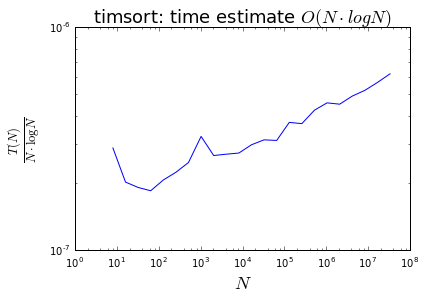

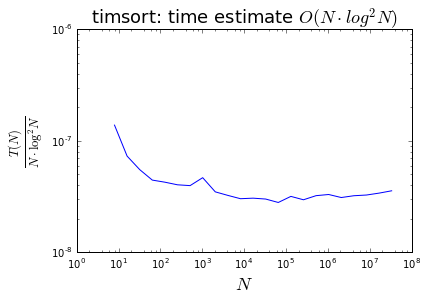

In [2]:
def bubble(L):
    i, j = 0, 0
    while i < len(L)-1:
        while j < len(L)-i-1:
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
            j += 1
        i += 1


import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 23
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
nlogn_list = []
nlogn2_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def timsort(l):
    l.sort()
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];timsort(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    T /= num_repeats
    N_list.append(N)
    T_list.append(T)
    nlogn_list.append(T / (N * math.log(N)))
    nlogn2_list.append(T / (N * math.log(N) ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('timsort: test time estimate $O(N \cdot log N)$', fontsize=16)
plt.show()

plt.plot(N_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('timsort: test time estimate $O(N \cdot log ^2 N)$', fontsize=16)
plt.show()

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done
8192 length done
16384 length done
32768 length done
65536 length done
131072 length done
262144 length done
524288 length done
1048576 length done
2097152 length done
4194304 length done
8388608 length done
16777216 length done
33554432 length done


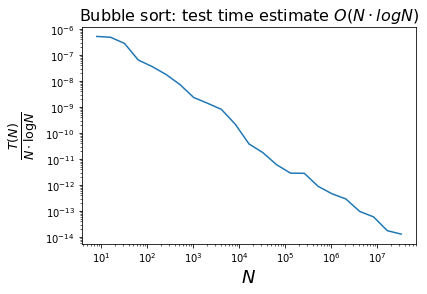

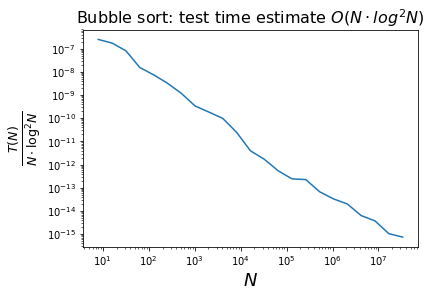

In [85]:
def bubble(L):
    i, j = 0, 0
    while i < len(L)-1:
        while j < len(L)-i-1:
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
            j += 1
        i += 1


import timeit
import math
import matplotlib.pyplot as plt
%matplotlib inline

start = 8
factor = 2
num_points = 23
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
nlogn_list = []
nlogn2_list = []
N = N_min
setup = """
import random
N = random.randint(10, 20)
L = random.sample(range(100), N)
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:]; bubble(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N, bubble=bubble)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N, bubble=bubble)
    )
    T -= T_copy
    T /= num_repeats
    N_list.append(N)
    T_list.append(T)
    nlogn_list.append(T / (N * math.log(N)))
    nlogn2_list.append(T / (N * math.log(N) ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('Bubble sort: test time estimate $O(N \cdot log N)$', fontsize=16)
plt.show()

plt.plot(N_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('Bubble sort: test time estimate $O(N \cdot log ^2 N)$', fontsize=16)
plt.show()

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done
8192 length done
16384 length done
32768 length done
65536 length done
131072 length done
262144 length done
524288 length done
1048576 length done
2097152 length done
4194304 length done
8388608 length done
16777216 length done
33554432 length done


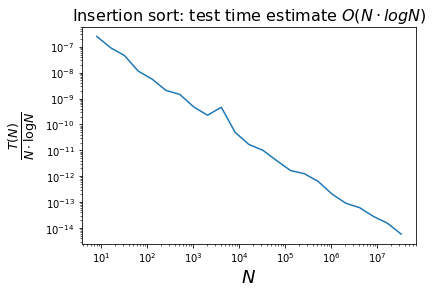

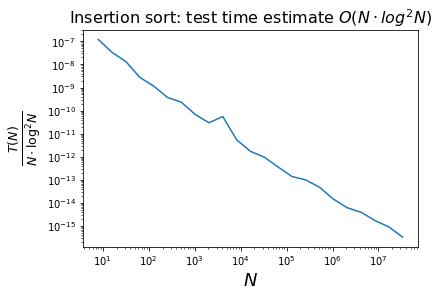

In [83]:
def ins(L):
    for i in range(len(L)):
        j = i - 1
        k = L[i]
        while L[j] > k and j >= 0:
            L[j+1] = L[j]
            j -= 1
        L[j+1] = k


import timeit
import math
import matplotlib.pyplot as plt
%matplotlib inline

start = 8
factor = 2
num_points = 23
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
nlogn_list = []
nlogn2_list = []
N = N_min
setup = """
import random
N = random.randint(10, 20)
L = random.sample(range(100), N)
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:]; ins(L)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N, ins=ins)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N, ins=ins)
    )
    T -= T_copy
    T /= num_repeats
    N_list.append(N)
    T_list.append(T)
    nlogn_list.append(T / (N * math.log(N)))
    nlogn2_list.append(T / (N * math.log(N) ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('Insertion sort: test time estimate $O(N \cdot log N)$', fontsize=16)
plt.show()

plt.plot(N_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('Insertion sort: test time estimate $O(N \cdot log ^2 N)$', fontsize=16)
plt.show()

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done
8192 length done
16384 length done
32768 length done
65536 length done
131072 length done
262144 length done
524288 length done
1048576 length done
2097152 length done
4194304 length done
8388608 length done
16777216 length done
33554432 length done


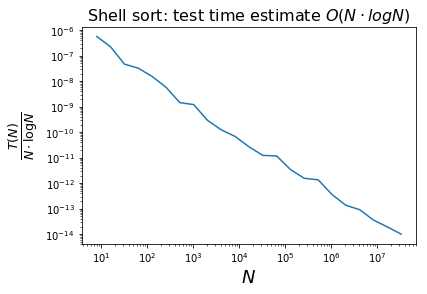

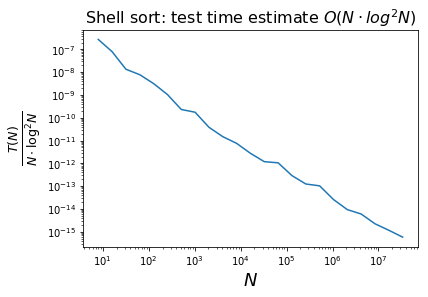

In [84]:
def shell_sort(L):
    n = len(L)
    d = n //2
    while d > 0:
        for i in range(d, n):
            temp = L[i]
            j = i
            while j >= d and L[j-d] > temp:
                L[j] = L[j-d]
                j -= d
            L[j] = temp
        d = d//2
        
import timeit
import math
import matplotlib.pyplot as plt
%matplotlib inline

start = 8
factor = 2
num_points = 23
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
nlogn_list = []
nlogn2_list = []
N = N_min
setup = """
import random
N = random.randint(10, 20)
L = random.sample(range(100), N)
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:]; shell_sort(L)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N, shell_sort=shell_sort)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N, shell_sort=shell_sort)
    )
    T -= T_copy
    T /= num_repeats
    N_list.append(N)
    T_list.append(T)
    nlogn_list.append(T / (N * math.log(N)))
    nlogn2_list.append(T / (N * math.log(N) ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('Shell sort: test time estimate $O(N \cdot log N)$', fontsize=16)
plt.show()

plt.plot(N_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('Shell sort: test time estimate $O(N \cdot log ^2 N)$', fontsize=16)
plt.show()

### Упражнение 7. Слияние

В двух файлах <font color=green>seq1.txt</font>, <font color=green>seq2.txt</font> записаны возрастающие последовательности целых чисел. Объедините эти последовательности в одну возрастающую последовательность и запишите ее в третий файл. Постарайтесь сделать алгоритм однопроходным.

#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 5 7<br>2 3 4 5 6</font> | <font size=3>1 2 3 3 4 5 5 6 7</font> |

In [31]:
with open('seq1.txt', 'r') as f1:
    f1_line = [int(i) for i in f1.readline().split()]
    with open('seq2.txt', 'r') as f2:
        f2_line = [int(j) for j in f2.readline().split()]

f1_line += f2_line

i, j = 0, 0
for i in range(len(f1_line)):
    j = i - 1
    k = f1_line[i]
    while f1_line[j] > k and j >= 0:
        f1_line[j+1] = f1_line[j]
        j -= 1
    f1_line[j+1] = k

with open('seq3.txt', 'w') as f3:
    for i in f1_line:
        f3.write(" ".join(str(i) + ' '))